# Notes to self 
1. Build a Q and A system? 
2. 80% of value comes from 20% of comments 
3. looked at long comments 
saw burnout fatigue guilt 

Talk about `miswanting` 

friends aren't interested in productivity shit <br>
one alternative going with a friend to starbucks 


<!-- TODO df.loc this comment -->
"i'm always trying to bring my friends on board with me, but only 2 out of 8 of my close friends cared about it. i opened a discord server exclusively for my friends so we can discuss anything we don't understand from school. but only i and my best friend went on it time to time. so i thought maybe they like to study alone.then, i got this other apps that tracks our studying time so if when one of us are unmotivated, the app shows us that there's a lot of people studying too, so we can feel better and get back on track. but also, only those 2 same friends used the app. it seems to be a waste of time to get those other 6 people onboard with me, i guess i'm just gonna leave without them. it's not that i'm cold-hearted, i gave you tickets not only once, but twice, and you still you didn't want to come on board even though all of us are heading towards the same destination. if you want to walk alone, that's fine. i'll probably see you at there, or i'm already onto my next station. goodbye. Choo-chooo",


## Course List 
* [Google Course](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight?specialization=google-advanced-data-analytics#modules)
* [Google Course](https://www.coursera.org/professional-certificates/google-business-intelligence#courses )
* [Get started with Python](https://www.coursera.org/learn/get-started-with-python?specialization=google-advanced-data-analytics#modules)

### Reddit Notes 

- you should be coming up with your hypothesis **first** and then finding the right data and analyzing and visualizing it.

1. What Problem are we tring to solve 
2. What does success look like 
3. what does failure look like 
4. what trends are important 
5. what drives the trend 
6. if trend is negative how can we fix it? 

`something like __ went up or __ went down is not insight, it's commentary`

There should be something that creates tension or unexpected. 
For instance, why are there more aspirational comments? maybe I should drop certain comments that are super small  

## Hypothesis and Questions? 
what are the fears,frustrations of my aspirations and how can i use that information to help them with productivity club?

# Imports 

In [1]:
import seaborn as sns 
import pandas as pd
import re
import ast
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

In [2]:
df = pd.read_csv('datasets/analysis.csv')

# Basic Preprocessing 

In [3]:
# Preprocess the text useful
def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'^b\s+', '', text)
    return text

In [4]:
df.rename(columns={
    'split_comments': 'comments',
    'reordered_scores': 'scores',
    'reordered_labels': 'labels'
}, inplace=True)

In [5]:
df['scores'] = df['scores'].apply((lambda x: ast.literal_eval(x)))
df['labels'] = df['labels'].apply(ast.literal_eval)

In [6]:

# Extract each score into a separate column and round to 4 digits
df['fears_score'] = df['scores'].apply(lambda x: round(x[0], 4))
df['frustrations_score'] = df['scores'].apply(lambda x: round(x[1], 4))
df['aspirations_score'] = df['scores'].apply(lambda x: round(x[2], 4))

# Visualisations 

## High Level Visualisations

### Overall Sentiment

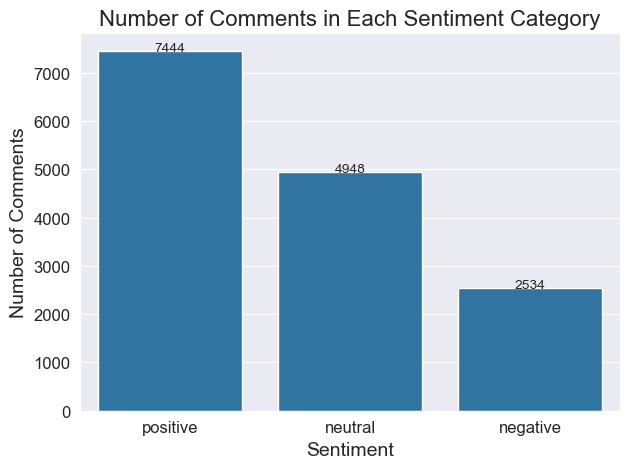

In [7]:

# Create a color palette for the bars
sns.color_palette("Spectral")
sns.set_style("darkgrid")
sns.barplot(x=df['sentiment'].value_counts().index, y=df['sentiment'].value_counts().values)
# Add the number of comments on top of each bar
for index, value in enumerate(df['sentiment'].value_counts().values):
    plt.text(index, value, str(value), ha='center')

# Set labels and title with increased font size
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.title('Number of Comments in Each Sentiment Category', fontsize=16)

# Increase the size of the ticks on both axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



### Distribution Of Each Sentiment 

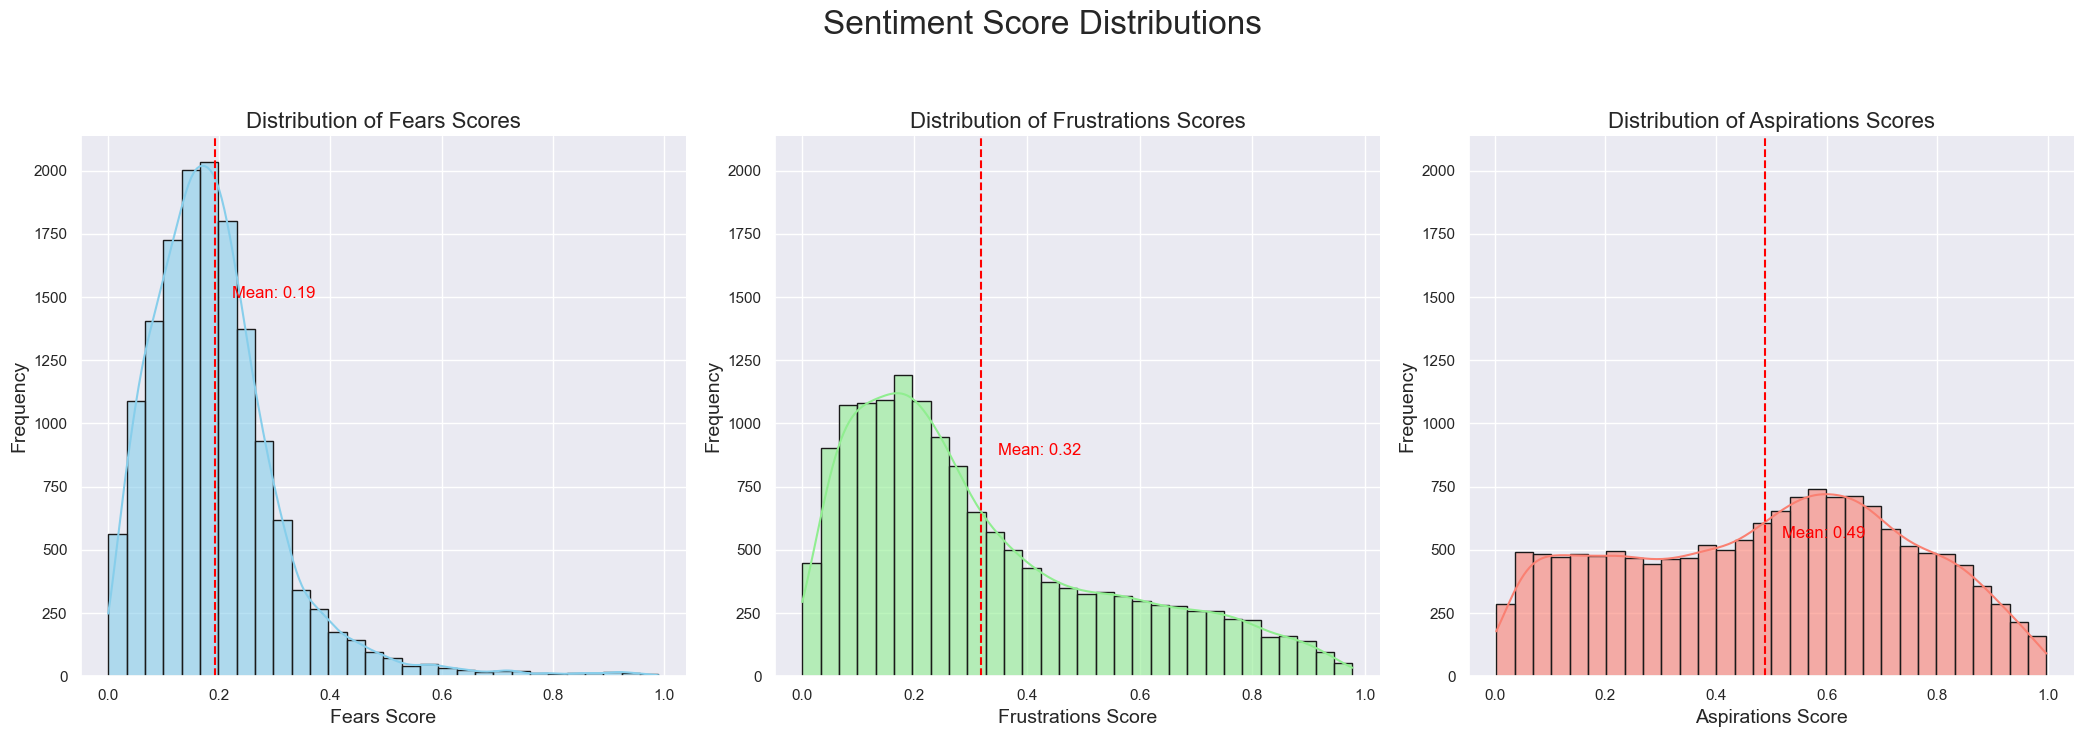

In [22]:
sns.set_theme(style='darkgrid',palette="pastel")
# Increase the figure size for better readability
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

# Customize the histograms and KDE plots
for i, (ax, score, color, title) in enumerate(zip(axes,
                                                  ['fears_score', 'frustrations_score', 'aspirations_score'],
                                                  ['skyblue', 'lightgreen', 'salmon'],
                                                  ['Fears', 'Frustrations', 'Aspirations'])):
    sns.histplot(df[score], bins=30, kde=True, ax=ax,color=color,  alpha=0.6, edgecolor="k")
    ax.set_title(f'Distribution of {title} Scores', fontsize=16)
    ax.set_xlabel(f'{title} Score', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.grid(True)  # Add grid lines for better readability

    # Add the mean score line
    mean_score = df[score].mean()
    ax.axvline(mean_score, color='red', linestyle='--')
    ax.text(mean_score + 0.03, ax.get_ylim()[1] * 0.7, f'Mean: {mean_score:.2f}', color='red')

# Remove the top and right axes spines for a cleaner look
for ax in axes:
    sns.despine(ax=ax)

# Standardize the y-axis across plots to make them easier to compare
max_ylim = max(ax.get_ylim()[1] for ax in axes)
for ax in axes:
    ax.set_ylim(0, max_ylim)

# Add a suptitle to the figure
fig.suptitle('Sentiment Score Distributions', fontsize=24, y=1.05)

# Adjust layout to fit everything cleanly
plt.tight_layout()

# Show the plot
plt.show()

* Viewers are more likely to express aspirations
  * In terms of how to talk to viewers you may want to show them how much your productivity advice can benfit them instead of talking about what would happen if they weren't productive 
> Caveat to this address in the running lean section about **loss aversion**

In [15]:
# group_by_label = df.groupby('title')
# # Calculate the proportion of comments in each category for each video
# score_analysis = group_by_label[['fears_score', 'frustrations_score', 'aspirations_score']].mean()

# # Reset the index to make 'title' a regular column
# score_analysis = score_analysis.reset_index()

# # Sort by one of the categories for visualization
# video_analysis_sorted = score_analysis.sort_values(by='fears_score', ascending=False)
# sns.set_style(style="darkgrid")
# # sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
# # List of scores to plot
# scores = ['fears_score', 'frustrations_score', 'aspirations_score']

# for score in scores:
#     # Sort the DataFrame by the current score
#     video_analysis_sorted = score_analysis.sort_values(by=score, ascending=False)
#      # Create the plot
#     plt.figure(figsize=(10, 6))
#     barplot = sns.barplot(data=video_analysis_sorted, x=score, y='title')

#     # Add the score values on the bars
#     for p in barplot.patches:
#         width = p.get_width()
#         plt.text(width + 0.01, p.get_y() + p.get_height() / 2,
#                  '{:1.2f}'.format(width),
#                  ha='left', va='center')
        
#     # Set the title, labels, and tick font sizes
#     plt.title(f'Top 10 Videos with the Highest Proportion of {score.replace("_", " ").capitalize()} Comments', fontsize=16)
#     plt.xlabel(f'Proportion of {score.replace("_", " ").capitalize()} Comments', fontsize=14)
#     plt.ylabel('Video Title', fontsize=14)
#     plt.xticks(rotation=45, fontsize=12)
#     plt.yticks(fontsize=12)
#     plt.tight_layout()
#     plt.show()

## Analysis of the 2 videos in the Aspiration Category 

In [16]:
top_videos = [
    'How to Make 2024 The Best Year of Your Life', 
    '5 Essential Tips For Long Lasting Productivity'
]

aspirational_video = df[df['title'].isin(top_videos)]
# rank by aspiration score 
# aspirational_video.sort_values(by='aspirations_score',ascending=False).iloc[0]

- people cannot seem to figure out how to develop categories in their life
    - check `aspirational_video.loc[11809]`
- people have inaccurate estimates about how long something will take 

## Distribution Of Sentiment

## Score Distribution 

In [17]:
# plt.figure(figsize=(12, 6))
# sns.histplot(df['fears_score'], kde=True, color='blue', label='Fears Score', alpha=0.6)
# sns.histplot(df['frustrations_score'], kde=True, color='red', label='Frustrations Score', alpha=0.6)
# sns.histplot(df['aspirations_score'], kde=True, color='green', label='Aspirations Score', alpha=0.6)
# plt.xlabel('Score')
# plt.ylabel('Density')
# plt.title('Distribution of Scores')
# plt.legend()
# plt.show()

### Sentiment v/s scores 

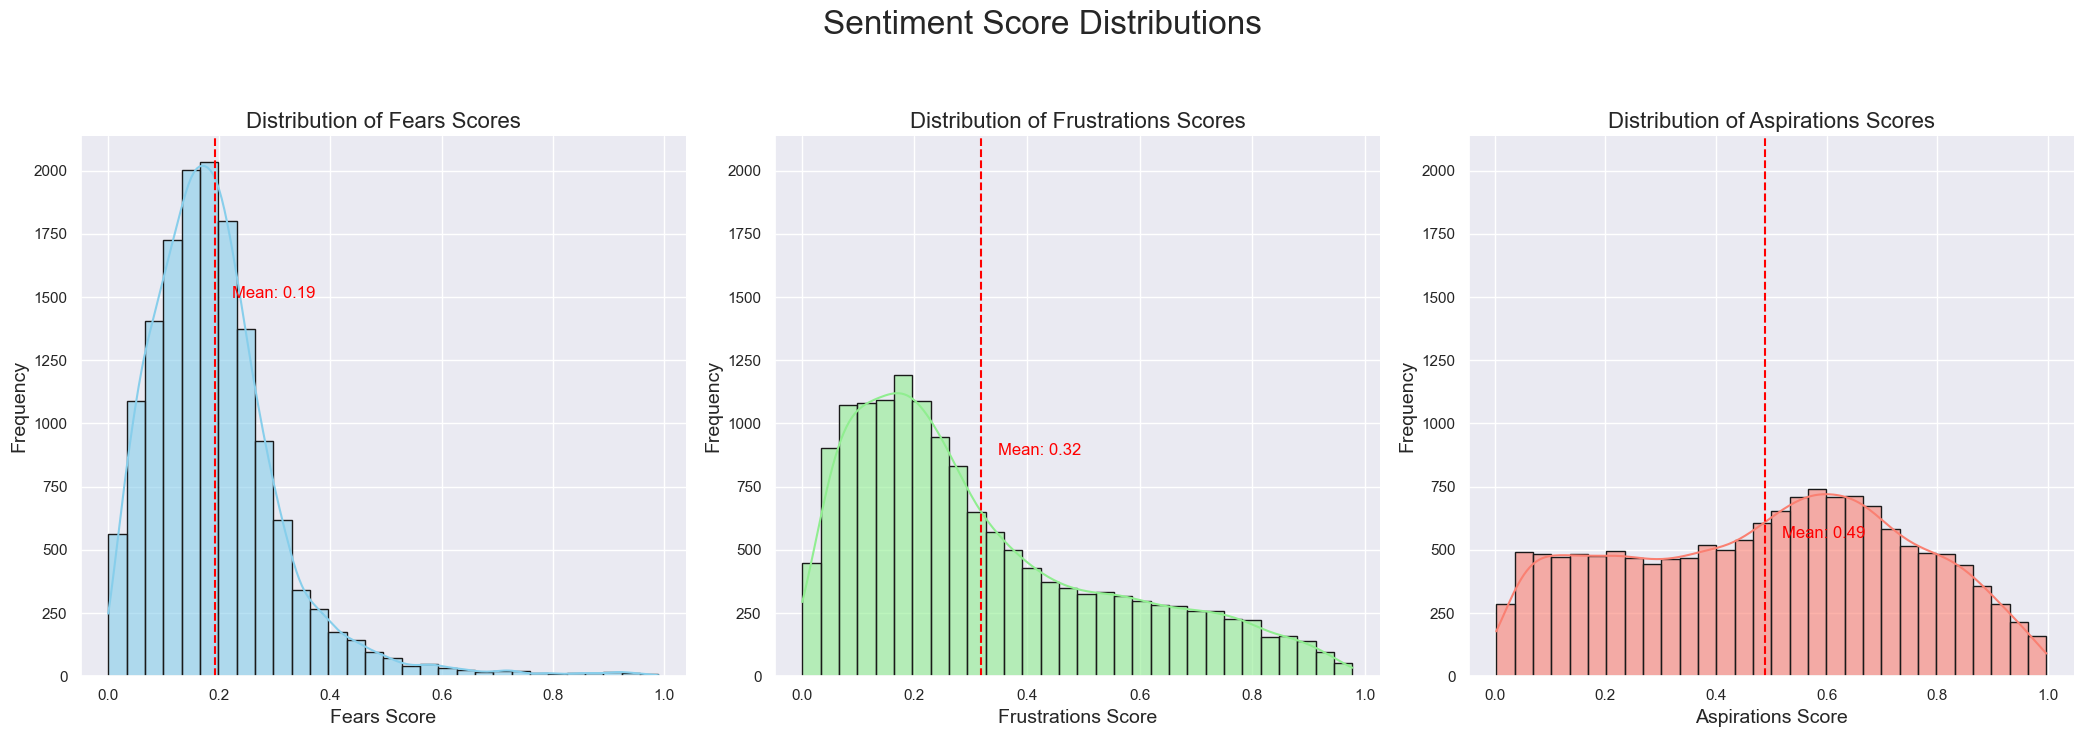

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme and palette
sns.set_theme(style='darkgrid', palette="pastel")

# Increase the figure size for better readability
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

# Define the scores, colors, and titles for the plots
scores = ['fears_score', 'frustrations_score', 'aspirations_score']
colors = ['skyblue', 'lightgreen', 'salmon']
titles = ['Fears', 'Frustrations', 'Aspirations']

# Customize the histograms and KDE plots
for ax, score, color, title in zip(axes, scores, colors, titles):
    sns.histplot(df[score], bins=30, kde=True, ax=ax, color=color, alpha=0.6, edgecolor="k")
    ax.set_title(f'Distribution of {title} Scores', fontsize=16)
    ax.set_xlabel(f'{title} Score', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.grid(True)  # Add grid lines for better readability

    # Add the mean score line
    mean_score = df[score].mean()
    ax.axvline(mean_score, color='red', linestyle='--')
    ax.text(mean_score + 0.03, ax.get_ylim()[1] * 0.7, f'Mean: {mean_score:.2f}', color='red')

# Remove the top and right axes spines for a cleaner look
for ax in axes:
    sns.despine(ax=ax)

# Standardize the y-axis across plots to make them easier to compare
max_ylim = max(ax.get_ylim()[1] for ax in axes)
for ax in axes:
    ax.set_ylim(0, max_ylim)

# Add a suptitle to the figure
fig.suptitle('Sentiment Score Distributions', fontsize=24, y=1.05)

# Adjust layout to fit everything cleanly
plt.tight_layout()

# Show the plot
plt.show()


# Rank Data by fears frustrations aspirations

In [61]:
# fears = df.sort_values(by='scores', key=lambda x: x.apply(lambda y: y[0]), ascending=False)
# frustrations = df.sort_values(by='scores', key=lambda x: x.apply(lambda y: y[1]), ascending=False)
aspirations = df.sort_values(by='scores', key=lambda x: x.apply(lambda y: y[2]), ascending=False)


# Analysis 

In [63]:
# fears = df.sort_values(by='scores', key=lambda x: x.apply(lambda y: y[0]), ascending=False)
# frustrations = df.sort_values(by='scores', key=lambda x: x.apply(lambda y: y[1]), ascending=False)
aspirations = df.sort_values(by='scores', key=lambda x: x.apply(lambda y: y[2]), ascending=False)

## comment Length 

In [25]:
data = df.copy()

In [26]:
# ! drop emojis 
data

,title,comments,scores,labels,sentiment,fears_score,frustrations_score,aspirations_score
0,How to Build Your Ultimate Productivity System,how to remember the system then?,"[0.20157860219478607, 0.34655919671058655, 0.45186224579811096]","[fears, frustrations, aspirations]",neutral,0.2016,0.3466,0.4519
1,How to Build Your Ultimate Productivity System,"15/3/24, x2.","[0.3612099289894104, 0.26915282011032104, 0.36963728070259094]","[fears, frustrations, aspirations]",neutral,0.3612,0.2692,0.3696
2,How to Build Your Ultimate Productivity System,thanks brother it's helping video :red_heart::party_popper:,"[0.14195847511291504, 0.17578278481960297, 0.6822587251663208]","[fears, frustrations, aspirations]",positive,0.1420,0.1758,0.6823
3,How to Build Your Ultimate Productivity System,you should try breathing and just being in the moment while you are in the toilet. :grinning_squinting_face:,"[0.19090235233306885, 0.4940927028656006, 0.31500494480133057]","[fears, frustrations, aspirations]",neutral,0.1909,0.4941,0.3150
4,How to Build Your Ultimate Productivity System,took me out when he said “my brain is a dumass” :face_with_tears_of_joy::face_with_tears_of_joy::face_with_tears_of_joy:,"[0.0920601338148117, 0.8241838812828064, 0.08375602215528488]","[fears, frustrations, aspirations]",negative,0.0921,0.8242,0.0838
...,...,...,...,...,...,...,...,...
14921,5 Small Changes to Supercharge Your Focus,please also upload hindi video,"[0.3803737759590149, 0.29799097776412964, 0.32163533568382263]","[fears, frustrations, aspirations]",neutral,0.3804,0.2980,0.3216
14922,5 Small Changes to Supercharge Your Focus,im 3rd,"[0.17630787193775177, 0.18799357116222382, 0.6356985569000244]","[fears, frustrations, aspirations]",neutral,0.1763,0.1880,0.6357
14923,5 Small Changes to Supercharge Your Focus,what if he pinned my cmt?:grinning_face_with_sweat:,"[0.5885409116744995, 0.3420863449573517, 0.06937270611524582]","[fears, frustrations, aspirations]",neutral,0.5885,0.3421,0.0694
14924,5 Small Changes to Supercharge Your Focus,first to comment,"[0.28964871168136597, 0.2726641297340393, 0.4376871585845947]","[fears, frustrations, aspirations]",neutral,0.2896,0.2727,0.4377


In [27]:
def remove_emojis(text): return re.sub(r':[a-zA-Z_]+:', '', text)

In [28]:
data['comments'] = data['comments'].apply(remove_emojis)

In [29]:
data['comments_length'] = data['comments'].apply(len)

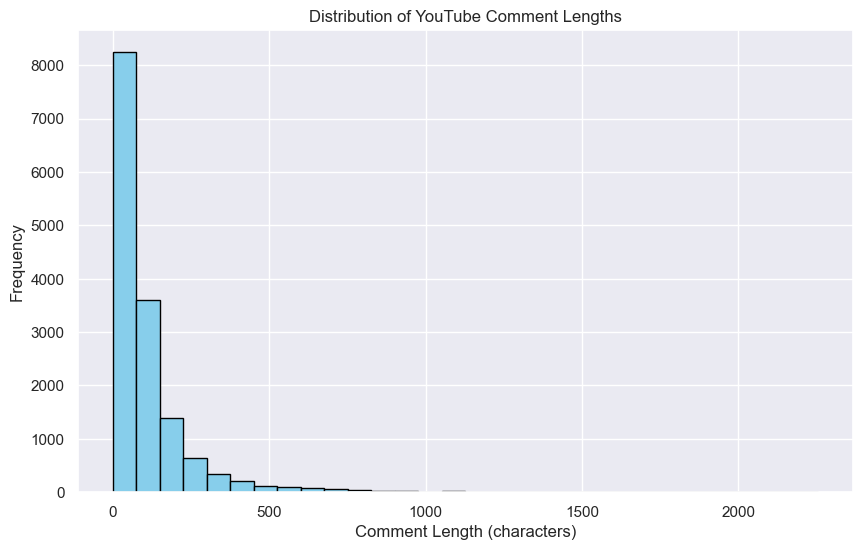

In [30]:
# plot comment length 
# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['comments_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of YouTube Comment Lengths')
plt.xlabel('Comment Length (characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Looking at comments above 1000 characters

In [31]:
long_comments = data.query("comments_length > 1000")

In [32]:
long_comments['comments']

42                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

"this is fantastic, really great video, very informative and structured. <br> although my main thing is that currently i'm looking for a tool that allows me to connect all these components together. something like notion or motion. also i have adhd so i need as much ai assistance as possible. <br> i'm smart so i do trust in my capabilities to build something from scratch like in notion, but really what i want is something where i can quickly brain dump and it does a lot of the sorting for me. <br> i like the idea of motion because it uses ai to adapt your schedule based on your to do list, but i do want something a little more advanced. i probably just need to tinker a little myself to really know what works, but i don't want to waste time building a system forever just to realise it's not for me. <br> i want to get as close as possible from the start. do you have recommendations? happy to use two but would like them to integrate. main thing is i want to do lists and my calendar to sync. <br> then also having a function for budgeting and outlining bigger goals and then breaking them down. i don't know, just an easy tool for a brain that is wired in tangents and need cross referencing..."
`df['comments'].loc[42]`

In [85]:
#  df[df['comments'].str.contains('video idea',case=False, na=False)]
# search for specific string 

In [86]:
# Order by specific Score
# group_title = df.groupby(['title'])
# def top(df,n=10,column='frustrations_score'):
#     return df.sort_values(column, ascending=False)
# group_title.apply(top)

# New Head 